# Generate two sets of random number using congruential method say x1 and x2 and then
find y1 = (-2ln*x1) ^ 1/2 cos(2*pie*x1)
y2 = (-2ln*x1) ^ 1/2 sin(2*pie * x2)

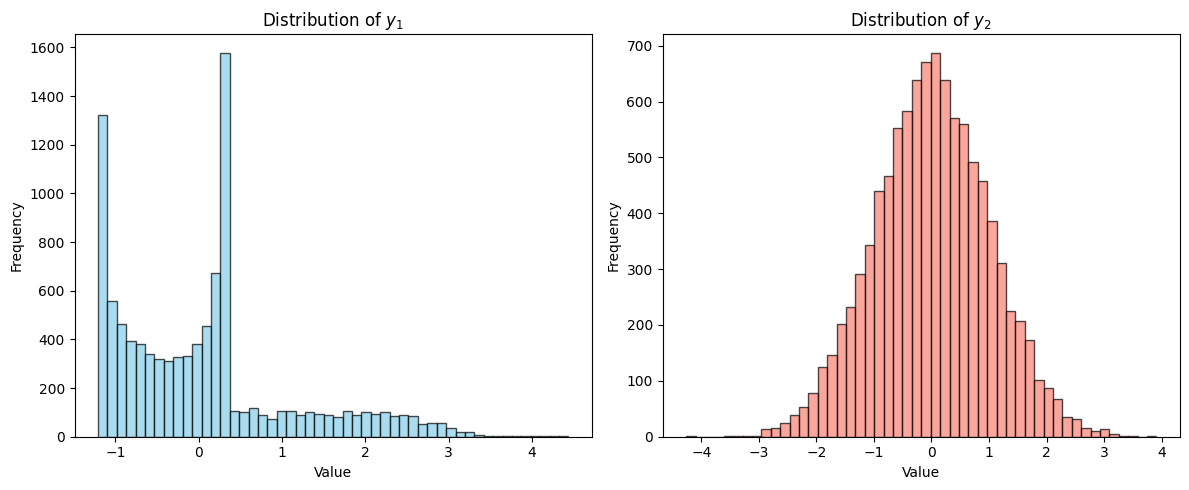

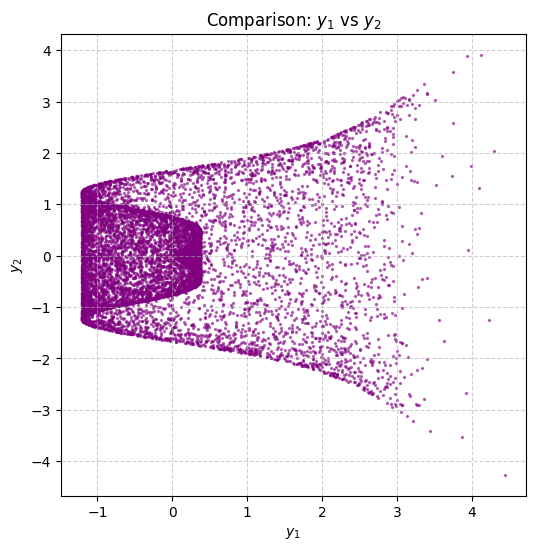

Statistical Comparison:
Number of samples: 10000
Statistics for x1: Mean = 0.5006, Std Dev = 0.2890
Statistics for x2: Mean = 0.4959, Std Dev = 0.2877
Statistics for y1: Mean = 0.0570, Std Dev = 1.0519
Statistics for y2: Mean = 0.0086, Std Dev = 0.9976


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def lcg(seed, n, a=1664525, c=16807, m=2**31-1):
    """
    Linear Congruential Generator to produce uniform random numbers in [0, 1).
    """
    numbers = []
    current = seed
    for _ in range(n):
        current = (a * current + c) % m
        numbers.append(current / m)

    return np.array(numbers)

# 1. Generate two sets of random numbers x1 and x2
N = 10000
x1 = lcg(seed=42, n=N)
x2 = lcg(seed=123, n=N)

# Avoid log(0) by ensuring no value is exactly zero
x1 = np.clip(x1, 1e-10, 1.0)

# 2. Calculate y1 and y2 based on the provided formulas
# y1 = (-2 * ln(x1))^1/2 * cos(2 * pi * x1)
# y2 = (-2 * ln(x1))^1/2 * sin(2 * pi * x2)
y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x1)
y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)

# 3. Plot the data
plt.figure(figsize=(12, 5))

# Plot Histogram for y1
plt.subplot(1, 2, 1)
plt.hist(y1, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(r'Distribution of $y_1$')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot Histogram for y2
plt.subplot(1, 2, 2)
plt.hist(y2, bins=50, color='salmon', edgecolor='black', alpha=0.7)
plt.title(r'Distribution of $y_2$')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Scatter Plot to compare y1 and y2
plt.figure(figsize=(6, 6))
plt.scatter(y1, y2, s=2, alpha=0.5, color='purple')
plt.title(r'Comparison: $y_1$ vs $y_2$')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Statistical Comparison
print("Statistical Comparison:")
print(f"Number of samples: {N}")
print(f"Statistics for x1: Mean = {np.mean(x1):.4f}, Std Dev = {np.std(x1):.4f}")
print(f"Statistics for x2: Mean = {np.mean(x2):.4f}, Std Dev = {np.std(x2):.4f}")
print(f"Statistics for y1: Mean = {np.mean(y1):.4f}, Std Dev = {np.std(y1):.4f}")
print(f"Statistics for y2: Mean = {np.mean(y2):.4f}, Std Dev = {np.std(y2):.4f}")

In [2]:
print("Statistical Comparison:")
print(f"Number of samples: {N}")

Statistical Comparison:
Number of samples: 10000


Statistics for x1 (LCG): Mean = 0.5006, Std Dev = 0.2890
Autocorrelation Coefficients: [np.float64(0.2506215945071008), np.float64(0.25137713200936085), np.float64(0.25095935899131644), np.float64(0.24907439156820485), np.float64(0.25009067765694815), np.float64(0.25183411220138735), np.float64(0.24993916573943742), np.float64(0.24906073318177707), np.float64(0.252125690963283), np.float64(0.24973288109228817), np.float64(0.2508579446834529), np.float64(0.24862052358397227), np.float64(0.25020294842235097), np.float64(0.24910451280899384), np.float64(0.25037298751972326), np.float64(0.24888158897520066), np.float64(0.24989995475723548), np.float64(0.25027088878980497), np.float64(0.250240334801547), np.float64(0.2508337179082844), np.float64(0.2508328457885188), np.float64(0.2521707764595431), np.float64(0.2499200038747412), np.float64(0.2510309802634133), np.float64(0.2496410035241375), np.float64(0.2508835457668075), np.float64(0.24985013537853162), np.float64(0.25160470945055685), n

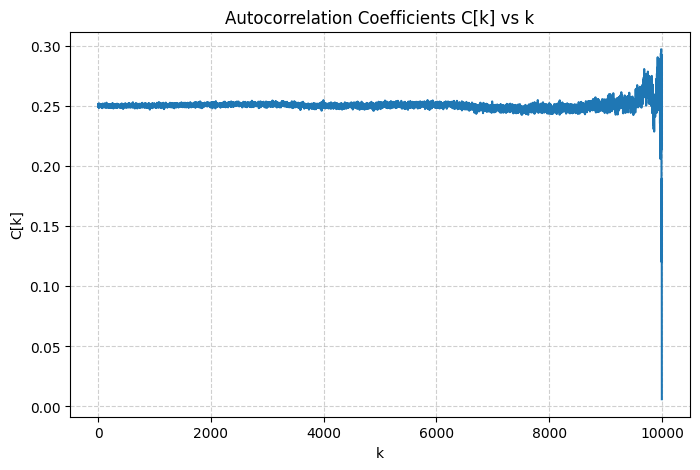

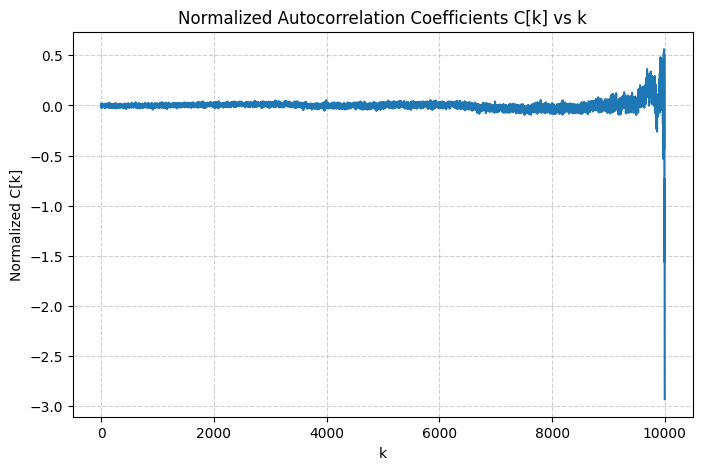

In [ ]:
# Autocorrelation Calculation for x1
N = 10000
# k = 1

x1 = lcg(seed=42, n=N)
# print(x1)

#  store the correlation coefficients for every k
Ck_values = []
Ck_normalized_values = []

for k in range(1, N):
    # print(f"Calculating C_{k}")
    sum_xy = 0
    for i in range(N-k):
        # print(f"i={i}, x1[i]={x1[i]}, x1[i+k]={x1[i+k]}")
        sum_xy += x1[i] * x1[i+k]
        # print(f"Intermediate sum_xy: {sum_xy}")

        # compute Ck

    Ck = sum_xy / (N - k)
    Ck_values.append(Ck)

    #  normalized Ck
    mean_x1 = np.mean(x1)
    Ck_normalized = (Ck - mean_x1**2) / (np.var(x1))
    Ck_normalized_values.append(Ck_normalized)
    # print(f"Correlation coefficient C_{k} for x1: {Ck}")

print(f"Statistics for x1 (LCG): Mean = {np.mean(x1):.4f}, Std Dev = {np.std(x1):.4f}")
# print("Autocorrelation Coefficients:", Ck_values)
# plot the Ck_values against k
plt.figure(figsize=(8, 5))
# plt.stem(range(1, N), Ck_values)
plt.plot(Ck_values)

plt.title('Autocorrelation Coefficients C[k] vs k')
plt.xlabel('k')
plt.ylabel('C[k]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# plot the normalized Ck_values against k
plt.figure(figsize=(8, 5))
# plt.stem(range(1, N), Ck_normalized_values)
plt.plot(Ck_normalized_values)
plt.title('Normalized Autocorrelation Coefficients C[k] vs k')
plt.xlabel('k')
plt.ylabel('Normalized C[k]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

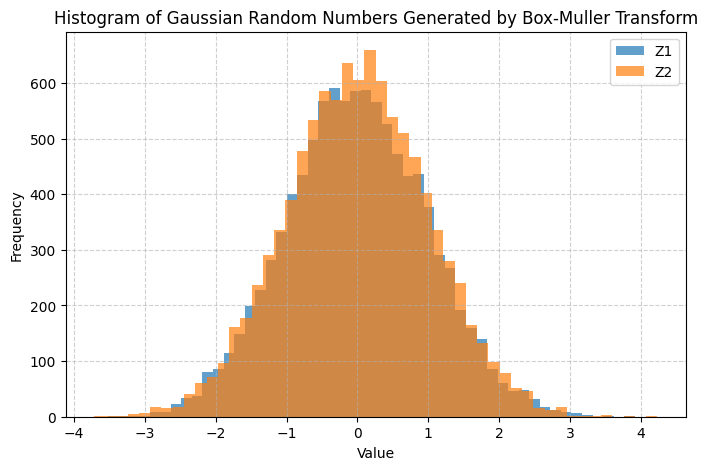

In [10]:
# Can we convert uniform distribution to gaussian distribution using the Box-Muller transform?
# Yes, we can! using the Box-Muller transform, we can convert two independent uniform random variables into two
# independent standard normally distributed random variables.
# It works by applying a mathematical transformation to pairs of uniform random numbers. The Box-Muller transform is defined as follows:
# Given two independent uniform random variables U1 and U2 in the interval (0, 1], we can generate two independent standard normal random variables Z0 and Z1 using the following formulas:
# Z0 = sqrt(-2 * ln(U1)) * cos(2 * pi * U2)
# Z1 = sqrt(-2 * ln(U1)) * sin(2 * pi * U2)

import matplotlib.pyplot as plt

def box_muller_transform(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

# Generate uniform random numbers
N = 10000
u1 = lcg(seed=42, n=N)
u2 = lcg(seed=43, n=N)

# Apply Box-Muller transform
z1, z2 = box_muller_transform(u1, u2)

# Plot histograms of the generated Gaussian random numbers
plt.figure(figsize=(8, 5))
plt.hist(z1, bins=50, alpha=0.7, label='Z1')
plt.hist(z2, bins=50, alpha=0.7, label='Z2')
plt.title('Histogram of Gaussian Random Numbers Generated by Box-Muller Transform')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Statistics for x1: Mean = 0.5055, Std Dev = 0.2899
Autocorrelation Coefficients using built-in random module: [0.2552416844918314, 0.2557941967735799, 0.25520823044939867, 0.2557068311770713, 0.25721345447236804, 0.2562223063926355, 0.2556533567577429, 0.2551027074423335, 0.2552409980246036, 0.2562184749499573, 0.25663749466432506, 0.2548480059868561, 0.25488620220550423, 0.25572541654741254, 0.25618915693375105, 0.2564915532141215, 0.25566546833312886, 0.25612000329032253, 0.255083932458484, 0.2558000403461953, 0.2547147568914017, 0.2560177713618297, 0.25588693640243354, 0.25770577322598237, 0.25357251230499445, 0.2559451635533299, 0.255330672717175, 0.25553852178058434, 0.2567094015460815, 0.2568154973070501, 0.2555570878981367, 0.253593769553032, 0.2557497512267157, 0.2548292808991343, 0.25571799474506884, 0.2553064954217391, 0.2551951203912081, 0.2554175000367244, 0.25580175280481054, 0.2558145458559437, 0.25552246586091276, 0.2550947711276203, 0.25535377896739353, 0.25584336168705

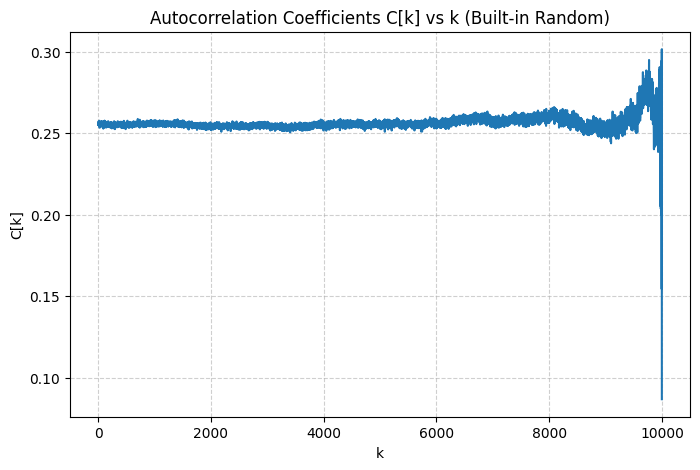

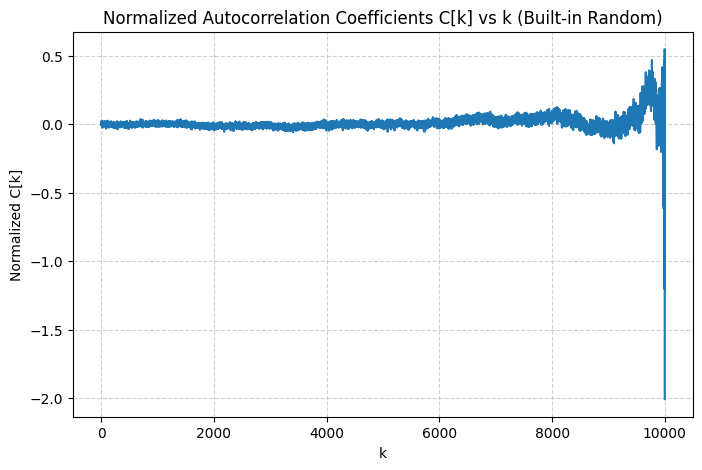

In [15]:
# Generate random numbers using python's built-in random module and find the autocorrelation coefficients.
import random
import numpy as np
import matplotlib.pyplot as plt
N = 10000
x1 = [random.random() for _ in range(N)]
# print(x1)
print(f"Statistics for x1: Mean = {np.mean(x1):.4f}, Std Dev = {np.std(x1):.4f}")
# store the correlation coefficients for every k
Ck_values = []
Ck_normalized_values = []

for k in range(1, N):
    # print(f"Calculating C_{k}")
    sum_xy = 0
    for i in range(N-k):
        # print(f"i={i}, x1[i]={x1[i]}, x1[i+k]={x1[i+k]}")
        sum_xy += x1[i] * x1[i+k]
        # print(f"Intermediate sum_xy: {sum_xy}")

        # compute Ck

    Ck = sum_xy / (N - k)
    Ck_values.append(Ck)

    #  normalized Ck
    mean_x1 = np.mean(x1)
    Ck_normalized = (Ck - mean_x1**2) / (np.var(x1))
    Ck_normalized_values.append(Ck_normalized)
    # print(f"Correlation coefficient C_{k} for x1: {Ck}")

print("Autocorrelation Coefficients using built-in random module:", Ck_values)
# plot the Ck_values against k
plt.figure(figsize=(8, 5))
# plt.stem(range(1, N), Ck_values)
plt.plot(Ck_values)
plt.title('Autocorrelation Coefficients C[k] vs k (Built-in Random)')
plt.xlabel('k')
plt.ylabel('C[k]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# plot the normalized Ck_values against k
plt.figure(figsize=(8, 5))
# plt.stem(range(1, N), Ck_normalized_values)
plt.plot(Ck_normalized_values)
plt.title('Normalized Autocorrelation Coefficients C[k] vs k (Built-in Random)')
plt.xlabel('k')
plt.ylabel('Normalized C[k]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
